## Warm-Up!

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

Step 1-2: 

In [2]:
spark = SparkSession.builder \
    .appName("Stock") \
    .getOrCreate()

df = spark.read.csv("stocks.csv", header=True, inferSchema=True)

df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



Step 3-4: 

In [3]:
print("Step 3:  For those records with closing price less than 500, select opening, closing and volume and show them.")
df.filter(col("Close") < 500).select("Open", "Close", "Volume").show()

print("Step 4:  Find out records with opening price more than 200 and closing price less than 200.")
df.filter((col("Open") > 200) & (col("Close") < 200)).show()


Step 3:  For those records with closing price less than 500, select opening, closing and volume and show them.
+------------------+------------------+---------+
|              Open|             Close|   Volume|
+------------------+------------------+---------+
|        213.429998|        214.009998|123432400|
|        214.599998|        214.379993|150476200|
|        214.379993|        210.969995|138040000|
|            211.75|            210.58|119282800|
|        210.299994|211.98000499999998|111902700|
|212.79999700000002|210.11000299999998|115557400|
|209.18999499999998|        207.720001|148614900|
|        207.870005|        210.650002|151473000|
|210.11000299999998|            209.43|108223500|
|210.92999500000002|            205.93|148516900|
|        208.330002|        215.039995|182501900|
|        214.910006|            211.73|153038200|
|        212.079994|        208.069996|152038600|
|206.78000600000001|            197.75|220441900|
|202.51000200000001|        203.070002|

In [4]:
print("Step 5:  Extract the year from the date and save it in a new column.")
df = df.withColumn("Year", year("Date"))
df.show()

Step 5:  Extract the year from the date and save it in a new column.
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|Year|
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|2010|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|2

In [5]:
print("Step 6: For each year, show the minimum volumes traded, shown in a column named ‘minVolume’.")
min_volume_df = df.groupBy("Year").agg(min("Volume").alias("minVolume"))
min_volume_df.show()

Step 6: For each year, show the minimum volumes traded, shown in a column named ‘minVolume’.
+----+---------+
|Year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



In [6]:
print("Step 7: For each year and month, show the highest low price, shown in a column named ‘maxLow’.")
df = df.withColumn("Month", month("Date"))
max_low_df = df.groupBy("Year", "Month").agg(max("Low").alias("maxLow"))
max_low_df.show()

Step 7: For each year and month, show the highest low price, shown in a column named ‘maxLow’.
+----+-----+------------------+
|Year|Month|            maxLow|
+----+-----+------------------+
|2012|   10|        665.550026|
|2010|    7|        260.300003|
|2010|   12|        325.099991|
|2015|    2|        131.169998|
|2014|    4|        589.799988|
|2015|   12|        117.809998|
|2016|    7|            103.68|
|2016|   11|        111.400002|
|2012|    8| 673.5400089999999|
|2013|    2|473.24997699999994|
|2012|    4| 626.0000150000001|
|2012|   12|        585.500023|
|2014|   10|        107.209999|
|2016|    5|             99.25|
|2014|   12|        115.290001|
|2013|    9|        503.479988|
|2013|   10|        525.110016|
|2014|    5|        628.900002|
|2016|    2|         96.650002|
|2013|   12| 566.4100269999999|
+----+-----+------------------+
only showing top 20 rows



In [7]:
print("Step 8: calculate mean and standard deviation of high price over the whole data frame and show them in two decimal places.")

high_price_mean, high_price_stddev = df.select(mean("High"), stddev("High")).first()

print(f"Mean High Price: {high_price_mean:.2f}")
print(f"Standard Deviation of High Price: {high_price_stddev:.2f}")

Step 8: calculate mean and standard deviation of high price over the whole data frame and show them in two decimal places.
Mean High Price: 315.91
Standard Deviation of High Price: 186.90


# Spotify Dataset Analysis

### Import Relevant Packages

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

### **Load the Dataset**

First we initialize spark session the load our dataset which is in .parquet format.

In [9]:
spark = SparkSession.builder \
    .appName("CorrelationMatrix") \
    .getOrCreate()

In [10]:
df = spark.read.parquet("spotify.parquet")

### Seeing the Data Structure and Schema:


In [11]:
df.describe().show()

+-------+--------------------+----------+---------------+--------------------+---------------------------+--------------------+-----------------+-------------------+-------------------+-------------------+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|                  id|      name|          album|            album_id|                    artists|          artist_ids|     track_number|        disc_number|       danceability|             energy|              key|           loudness|               mode|        speechiness|       acousticness|   instrumentalness|           liveness|            valence|             tempo|       duration_ms|    time_signature|              year|      release_date|
+-------+--------------------+----------+---------------+--------------------+----

In [12]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)



In [13]:
df.show(truncate=False)

+----------------------+----------------------+-------------------------+----------------------+----------------------------+--------------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+-----------------+--------------------+------------------+------------------+------------------+-----------+--------------+----+------------+
|id                    |name                  |album                    |album_id              |artists                     |artist_ids                |track_number|disc_number|explicit|danceability      |energy            |key|loudness           |mode|speechiness|acousticness     |instrumentalness    |liveness          |valence           |tempo             |duration_ms|time_signature|year|release_date|
+----------------------+----------------------+-------------------------+----------------------+----------------------------+--------------------------+------------+-----------+--------+

### Data Cleaning: 

In [14]:
df = spark.read.parquet("spotify.parquet")

Converting Boolean values to integers for simpler analysis processing : 

In [15]:
df = spark.read.parquet("spotify.parquet")
df = df.withColumn("explicit", when(col("explicit") == True, 1).otherwise(0))

Reviewing our data for any missing values:

In [16]:
for column in df.columns:
    missing_rows = df.where(col(column).isNull())
    missing_count = missing_rows.count()
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values.")
        print("Rows with missing values:")
        missing_rows.show(truncate=False)
        print("\n")


Column 'name' has 3 missing values.
Rows with missing values:
+----------------------+----+-------------------+----------------------+---------------------------------------+------------------------------------------------------------------------------+------------+-----------+--------+------------+------------------+---+--------+----+-----------+------------+------------------+--------+------------------+-------+-----------+--------------+----+------------+
|id                    |name|album              |album_id              |artists                                |artist_ids                                                                    |track_number|disc_number|explicit|danceability|energy            |key|loudness|mode|speechiness|acousticness|instrumentalness  |liveness|valence           |tempo  |duration_ms|time_signature|year|release_date|
+----------------------+----+-------------------+----------------------+---------------------------------------+------------------------

Since number of missing data very low  (0.0011 % of our data ) we could drop rows with NA values


In [17]:
df = df.dropna()

#### Identifying variations in our years and inspecting them for missing or incorrect values:

In [18]:
year_counts = df.groupBy("year").count().orderBy("year")
ordered_year_counts = year_counts.orderBy("year")
ordered_year_counts.show(ordered_year_counts.count(), truncate=False)

+----+-----+
|year|count|
+----+-----+
|0   |10   |
|1900|14   |
|1908|19   |
|1909|25   |
|1917|52   |
|1920|25   |
|1923|50   |
|1924|36   |
|1925|49   |
|1926|107  |
|1927|48   |
|1928|114  |
|1929|32   |
|1930|59   |
|1931|35   |
|1932|59   |
|1933|63   |
|1935|20   |
|1936|83   |
|1937|40   |
|1938|68   |
|1939|26   |
|1942|48   |
|1943|40   |
|1944|45   |
|1945|154  |
|1946|29   |
|1947|84   |
|1948|50   |
|1949|203  |
|1950|161  |
|1951|175  |
|1952|100  |
|1953|118  |
|1954|203  |
|1955|179  |
|1956|508  |
|1957|412  |
|1958|473  |
|1959|830  |
|1960|727  |
|1961|623  |
|1962|842  |
|1963|905  |
|1964|729  |
|1965|933  |
|1966|932  |
|1967|916  |
|1968|930  |
|1969|1247 |
|1970|1110 |
|1971|1202 |
|1972|1938 |
|1973|1762 |
|1974|1389 |
|1975|1806 |
|1976|1985 |
|1977|1962 |
|1978|1923 |
|1979|2106 |
|1980|2119 |
|1981|1897 |
|1982|1754 |
|1983|1977 |
|1984|2571 |
|1985|2596 |
|1986|2727 |
|1987|3314 |
|1988|4545 |
|1989|5095 |
|1990|7453 |
|1991|8380 |
|1992|9639 |
|1993|11017|

Since the number of music with year 0 is not much we remove their rows

In [19]:
df = df.filter(col("year") != 0)

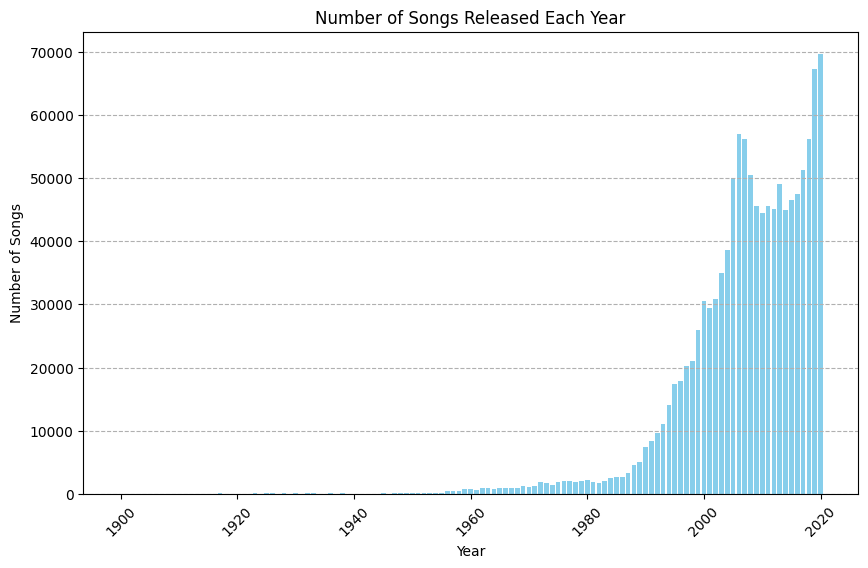

In [20]:
year_counts = df.groupBy("year").count().orderBy("year")
year_counts_list = year_counts.collect()
years = [row["year"] for row in year_counts_list]
counts = [row["count"] for row in year_counts_list]

plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs Released Each Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [21]:
no_day_month = df.filter((length(col("release_date")) < 8)).count()
print("Rows with no day or month in release_date:", no_day_month)

Rows with no day or month in release_date: 131176


So, approximately 10.89% of our data is missing day or month information. Due to the significant proportion of missing values, simply dropping or ignoring these entries may not be a viable option.

#### Preprocessing artist data: When two artists are joined by "&" or " w/ " instead of "," for separation.

In [22]:
print("An example before preprocessing:")
fdf = df.filter(df["id"] == '2SwgVZn9S4NGueAaEAryf1')
fdf.show(truncate=False)

df = df.withColumn("artists", regexp_replace(df["artists"], " & ", "', '"))
df = df.withColumn("artists", regexp_replace(df["artists"], " w/ ", "', '"))

print("An example after preprocessing:")
fdf = df.filter(df["id"] == '2SwgVZn9S4NGueAaEAryf1')
fdf.show(truncate=False)


An example before preprocessing:
+----------------------+----------------+--------------+----------------------+---------------------------+--------------------------+------------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+------------------+-------+-------+-----------+--------------+----+------------+
|id                    |name            |album         |album_id              |artists                    |artist_ids                |track_number|disc_number|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness          |valence|tempo  |duration_ms|time_signature|year|release_date|
+----------------------+----------------+--------------+----------------------+---------------------------+--------------------------+------------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+------------------+-------+-------+-----------+--------------

#### **Plot Correlation Matrix**

We plot it to see the correlation of numerical features in dataset and gain insights from the visualizations.

First, we normalize our data to better observe the relative increases and decreases in relation to one another, and then we display a heatmap of the correlation matrix to visualize the relationships between the features.

In [23]:
df_copy = df
numeric_columns = [col_name for col_name, col_type in df_copy.dtypes if col_type in ['int', 'bigint', 'float', 'double']]

for col_name in numeric_columns:
    min_max_values = df_copy.agg({col_name: "min"}).union(df_copy.agg({col_name: "max"})).collect()
    min_val, max_val = min_max_values[0][0], min_max_values[1][0]
    df_copy = df_copy.withColumn(col_name, (col(col_name) - min_val) / (max_val - min_val))

df_copy.show(truncate=False)

+----------------------+----------------------+-------------------------+----------------------+----------------------------+--------------------------+--------------------+-----------+--------+------------------+------------------+-------------------+------------------+----+-------------------+---------------------+--------------------+------------------+------------------+-------------------+--------------------+--------------+------------------+------------+
|id                    |name                  |album                    |album_id              |artists                     |artist_ids                |track_number        |disc_number|explicit|danceability      |energy            |key                |loudness          |mode|speechiness        |acousticness         |instrumentalness    |liveness          |valence           |tempo              |duration_ms         |time_signature|year              |release_date|
+----------------------+----------------------+---------------------

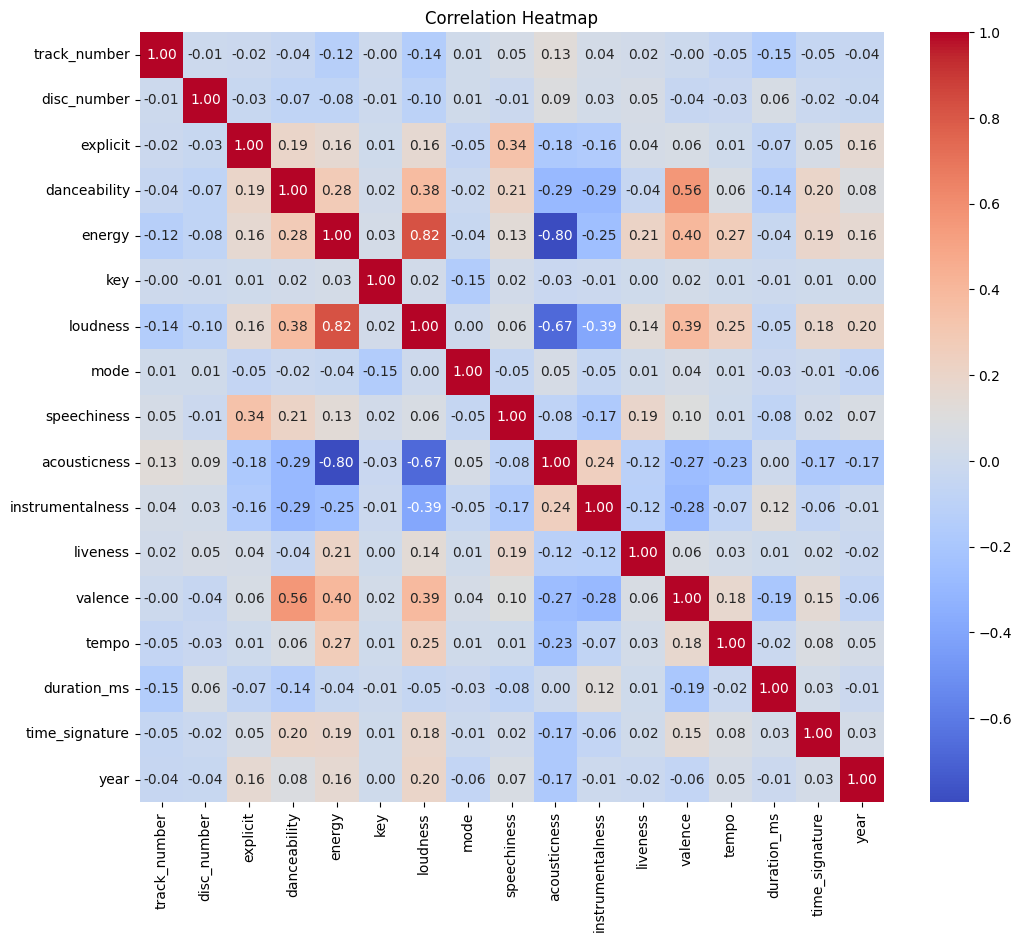

In [24]:
vector_assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_vectorized = vector_assembler.transform(df_copy).select("features")

correlation_matrix = Correlation.corr(df_vectorized, "features").head()
corr_matrix = correlation_matrix[0].toArray()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=numeric_columns, yticklabels=numeric_columns)
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation heatmap, we can infer that there is a very positive correlation (0.82) between loudness and energy levels. Additionally, there is a high correlation between valence and danceability, as well as between energy and loudness. We also observe a moderate correlation between loudness and danceability, suggesting that higher danceability does not necessarily require high loudness.

On the contrary, there is a very low correlation between acousticness and energy, indicating a negative relationship. If we seek energetic music, it might be necessary to prioritize non-acoustic tracks.

Furthermore, acousticness demonstrates a negative correlation with loudness, suggesting that for calmer and more soothing music, acoustic versions might be preferable. Additionally, there is a negative correlation of 0.39 between loudness and the instrumental aspect of music.

For the variables Music Explicitness and Speechiness, we observe a correlation coefficient of 0.32. This could be due to the fact that explicit content often involves speech elements, leading to an association between the two.

### Employing Exploratory Data Analysis to Analyze Our Spotify Data:

#### Seprating data frame by the artists: 

To analyze songs by the artist, we explode the data frame, separating the artists into an "artist" column for further processing. This means that each artist has its own row, featured with a song.

In [25]:
df_artists = df.withColumn("artist", explode(split(df["artists"], "', '")))
pattern = "[^a-zA-Z\s]+"
df_artists_cleaned = df_artists.withColumn("artist", regexp_replace(col("artist"), pattern, ""))
df_artists=df_artists_cleaned

In [26]:
filtered_data = df.filter(col("id") == "4kJAzyeZ8ViT3vk7ee1IwW")
filtered_data.select("id","artists").show(truncate=False)

filtered_data = df_artists_cleaned.filter(col("id") == "4kJAzyeZ8ViT3vk7ee1IwW")
filtered_data.select("id","artist", "artists").show(truncate=False)

+----------------------+-----------------------------------------------------------------+
|id                    |artists                                                          |
+----------------------+-----------------------------------------------------------------+
|4kJAzyeZ8ViT3vk7ee1IwW|['Sven-David Sandström', 'Swedish Radio Choir', 'Peter Dijkstra']|
+----------------------+-----------------------------------------------------------------+

+----------------------+-------------------+-----------------------------------------------------------------+
|id                    |artist             |artists                                                          |
+----------------------+-------------------+-----------------------------------------------------------------+
|4kJAzyeZ8ViT3vk7ee1IwW|SvenDavid Sandstrm |['Sven-David Sandström', 'Swedish Radio Choir', 'Peter Dijkstra']|
|4kJAzyeZ8ViT3vk7ee1IwW|Swedish Radio Choir|['Sven-David Sandström', 'Swedish Radio Choir', 'Peter D

#### Artists with most dancebility songs

if we want to arrange a party we might think about which artist's song we should add to the party's playlist. :)

In [27]:
artist_danceability = df_artists.groupBy("artist").agg(avg("danceability").alias("avg_danceability"))
top_artists = artist_danceability.orderBy("avg_danceability", ascending=False)

top_artists.show(truncate=False)

+------------------+----------------+
|artist            |avg_danceability|
+------------------+----------------+
|Andrea HEinstein  |0.992           |
|Gen               |0.987           |
|Juelz B           |0.987           |
|Audio Soul Project|0.986           |
|LILDRUGHILL       |0.984           |
|Lim               |0.983           |
|rd Face           |0.981           |
|Money Maru        |0.981           |
|Lul Florida       |0.98            |
|Franko Murry      |0.98            |
|aidan             |0.98            |
|Desi Mo           |0.979           |
|Boddhi Satva      |0.979           |
|Matches           |0.979           |
|Brooklyn Michelle |0.977           |
|Lilcockpump       |0.977           |
|Rippa             |0.976           |
|Dezza             |0.974           |
|Nikolai           |0.974           |
|Djuro             |0.973           |
+------------------+----------------+
only showing top 20 rows



#### Artists With the Most Or Least Speakness Songs with highest energy

Which type of music are we looking for? The songs that we hear singer's voice most of times or we want to enjoy the instrument of music?

Here the artists and albums we should listen to.



In [28]:
speechiness_stats = df_artists.groupBy("artist").agg(avg("speechiness").alias("avg_speechiness"))
most_speechiness_artists = speechiness_stats.orderBy(desc("avg_speechiness")).limit(10)

print("Artists with the Most Speechiness Songs:")
most_speechiness_artists.show(truncate=False)

energy_stats = df_artists.groupBy("artist").agg(avg("energy").alias("avg_energy"))

least_speechiness_highest_energy_artists = speechiness_stats.join(energy_stats, "artist") \
    .orderBy(asc("avg_speechiness"), desc("avg_energy")) \
    .limit(10)

print("Artists with the Least Speechiness Songs and Highest Energy:")
least_speechiness_highest_energy_artists.show(truncate=False)

Artists with the Most Speechiness Songs:
+-------------------+------------------+
|artist             |avg_speechiness   |
+-------------------+------------------+
|Cratis Williams    |0.963             |
|Cheech Marin       |0.963             |
|Mindy Kaling       |0.962             |
|Eddie Deville      |0.962             |
|Susi Amendola      |0.9604285714285714|
|Dan Mintz          |0.96              |
|Michel Rosenberg   |0.96              |
|Typical Div        |0.959             |
|Rabbi Peysach Krohn|0.959             |
|Stavros            |0.958             |
+-------------------+------------------+

Artists with the Least Speechiness Songs and Highest Energy:
+-----------------------+---------------+------------------+
|artist                 |avg_speechiness|avg_energy        |
+-----------------------+---------------+------------------+
|Tortured Machine       |0.0            |0.968             |
|Jeffrey Dorfman        |0.0            |0.884             |
|Joseph Shirley   

#### Discovering albums with high energy levels or great danceability : 

In [29]:
album_stats = df.groupBy("album", "album_id") \
    .agg({"energy": "avg", "danceability": "avg"}) \
    .withColumnRenamed("avg(energy)", "avg_energy") \
    .withColumnRenamed("avg(danceability)", "avg_danceability")

album_stats = album_stats.withColumn("avg_energy", format_number("avg_energy", 4))
album_stats = album_stats.withColumn("avg_danceability", format_number("avg_danceability", 3))

top_energy_album = album_stats.orderBy(desc("avg_energy")).limit(15)
top_danceability_album = album_stats.orderBy(desc("avg_danceability")).limit(15)

print("Album with the highest average energy:")
top_energy_album.show(truncate=False)

print("Album with the highest average danceability:")
top_danceability_album.show(truncate=False)

Album with the highest average energy:
+-------------------------+----------------------+----------------+----------+
|album                    |album_id              |avg_danceability|avg_energy|
+-------------------------+----------------------+----------------+----------+
|Wind Chime Waterfall     |4Z9fJFkNsGLHs4shwgVxSC|0.196           |1.0000    |
|Bitter Boy               |6NEO2JShFK0nDebV8JH12n|0.351           |0.9993    |
|Booty of Mass Destruction|2fWprlkuIXZvxjSeTt2WJB|0.386           |0.9990    |
|Härd Sweetcöre           |2d40xjmfh57XEyRkSWi4Pf|0.577           |0.9990    |
|Spark Plug               |0vHCsnFmQm5BHp3TCJjMhX|0.617           |0.9990    |
|Astral Sounds            |4vgHMIp2RIMErRzJl52T0T|0.372           |0.9990    |
|Hammergeil               |4UgiGK5B6J16phlstLxSS5|0.655           |0.9990    |
|A Fit Of The Giggles     |0FL6c7rOCJBaD5f07Rkvx8|0.686           |0.9990    |
|Wicked                   |3ZXHwmmYHHKyjZAq5vFpzd|0.531           |0.9990    |
|Card Game   

### Top artists with the most explicit

In [30]:
explicit_stats = df_artists.select("explicit", "artist").groupBy("artist").agg(sum("explicit").alias("sum_explicit"))
most_explicit_artists = explicit_stats.orderBy(desc("sum_explicit")).limit(10)

print("Albums with the Most explicit Songs:")
most_explicit_artists.show(truncate=False)

Albums with the Most explicit Songs:
+---------------+------------+
|artist         |sum_explicit|
+---------------+------------+
|Grant Macdonald|561         |
|Mac Dre        |352         |
|Lil B          |266         |
|Yukmouth       |253         |
|Tech Nne       |244         |
|Future         |225         |
|E              |222         |
|Three  Mafia   |205         |
|Gucci Mane     |204         |
|Chris Brown    |197         |
+---------------+------------+



### The Relation of Loudness and Energy

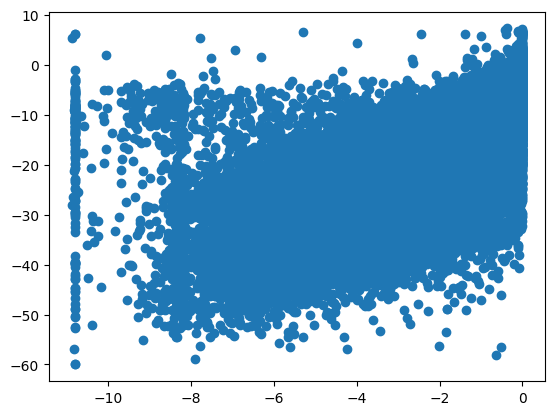

In [31]:
df = df.withColumn("log_energy", log("energy"))

energy_loudness_data = df.select("log_energy", "loudness").collect()

log_energy = [row['log_energy'] for row in energy_loudness_data]
loudness = [row['loudness'] for row in energy_loudness_data]

plt.scatter(log_energy, loudness)

As we see there is a positive correlation between the loudness of a song and its enrgy. We use logarithm of energy to see the correlation better.

### Duration of songs over the year

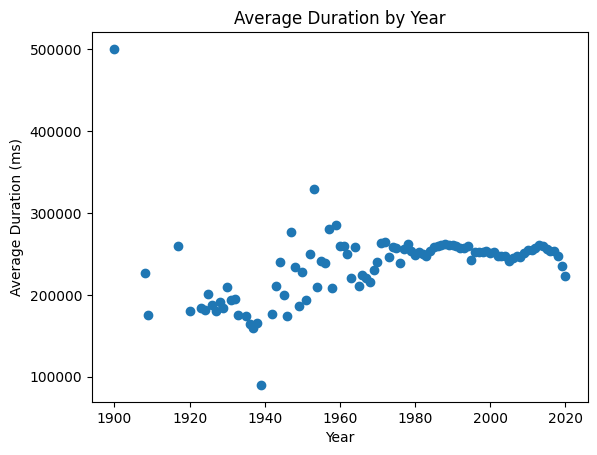

In [32]:
duration_stats = df.select("duration_ms", "year").groupBy("year").agg(avg("duration_ms").alias("avg_duration_ms"))

duration_data = duration_stats.collect()

years = [row['year'] for row in duration_data]
avg_durations = [row['avg_duration_ms'] for row in duration_data]

plt.scatter(years, avg_durations)
plt.xlabel('Year')
plt.ylabel('Average Duration (ms)')
plt.title('Average Duration by Year')
plt.show()

The average of duration of songs in each year has a linear relationship but there is an outlayer here in a year around 1900. Let's find out why.

Firsr of all we must see the exact year.

In [33]:
long_song_year_data = duration_stats.filter(col("avg_duration_ms") > 400000)
long_song_year_data.show()

+----+---------------+
|year|avg_duration_ms|
+----+---------------+
|1900|       500062.0|
+----+---------------+



As we see the exact year is 1900

In [34]:
songs1900_data = df.select("album", "artists", "duration_ms", "year").filter(col("year") == 1900 )

songs1900_data.show()

+-------------+--------------------+-----------+----+
|        album|             artists|duration_ms|year|
+-------------+--------------------+-----------+----+
|Arabian Waltz|['Rabih Abou-Khal...|     493867|1900|
|Arabian Waltz|['Rabih Abou-Khal...|     730667|1900|
|Arabian Waltz|['Rabih Abou-Khal...|     421760|1900|
|Arabian Waltz|['Rabih Abou-Khal...|     672707|1900|
|Arabian Waltz|['Rabih Abou-Khal...|     601027|1900|
|Arabian Waltz|['Rabih Abou-Khal...|     566840|1900|
|    Al-Jadida|['Rabih Abou-Khal...|     465000|1900|
|    Al-Jadida|['Rabih Abou-Khal...|     578000|1900|
|    Al-Jadida|['Rabih Abou-Khal...|     423000|1900|
|    Al-Jadida|['Rabih Abou-Khal...|     433960|1900|
|    Al-Jadida|['Rabih Abou-Khal...|     532173|1900|
|    Al-Jadida|['Rabih Abou-Khal...|     243867|1900|
|    Al-Jadida|['Rabih Abou-Khal...|     513000|1900|
|    Al-Jadida|['Rabih Abou-Khal...|     325000|1900|
+-------------+--------------------+-----------+----+



The reason of the outlier is about lack of data in 1900. All of songs in 1900 year is for a single artist who likes long song. 

### Explicty of songs over the years

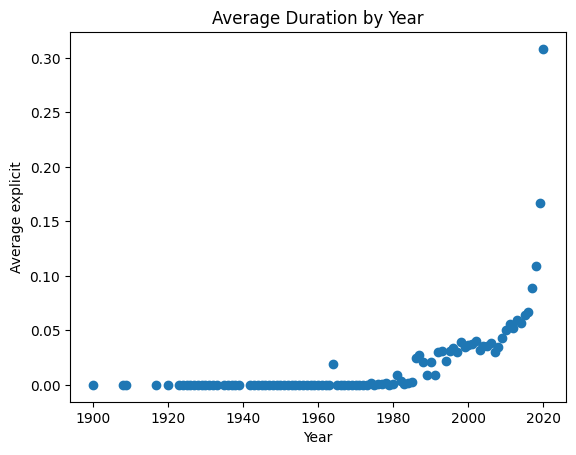

In [35]:
explicit_years_stats = df.select("explicit", "year").groupBy("year").agg(avg("explicit").alias("avg_explicit"))

explicit_years_data = explicit_years_stats.collect()

years = [row['year'] for row in explicit_years_data]
avg_explicit = [row['avg_explicit'] for row in explicit_years_data]

plt.scatter(years, avg_explicit)
plt.xlabel('Year')
plt.ylabel('Average explicit')
plt.title('Average Duration by Year')
plt.show()

Before 1980, we can say there was almost no explicit content in music, but after 1980, it has been increasing exponentially.

#### When the artists drop new album. They are going to play the album on concerts. If we are that concert guy these are the albums tour we should go.

In [36]:
liveness_stats = df.select("album", "liveness").groupBy("album").agg(avg("liveness").alias("avg_liveness"))
most_liveness_artists = liveness_stats.orderBy(desc("avg_liveness")).limit(10)

print("Albums with the Most liveness Songs:")
most_liveness_artists.show(truncate=False)

Albums with the Most liveness Songs:
+--------------------------------------------------------------------------------------+------------+
|album                                                                                 |avg_liveness|
+--------------------------------------------------------------------------------------+------------+
|It's the End of the World as We Know It (And I Feel Fine) [100 Days, 100 Songs] [Live]|0.998       |
|Don't Tell Me You Love Me (Live)                                                      |0.996       |
|Don't It Make My Brown Eyes Blue                                                      |0.996       |
|Frühstückskorn (Live im SO36)                                                         |0.994       |
|Something Just Like This (Tokyo Remix)                                                |0.988       |
|1000 gute Gründe (Ohne Strom)                                                         |0.987       |
|Live At the Hollywood Disco                 

### Distribution of Maximum Track Number per Album

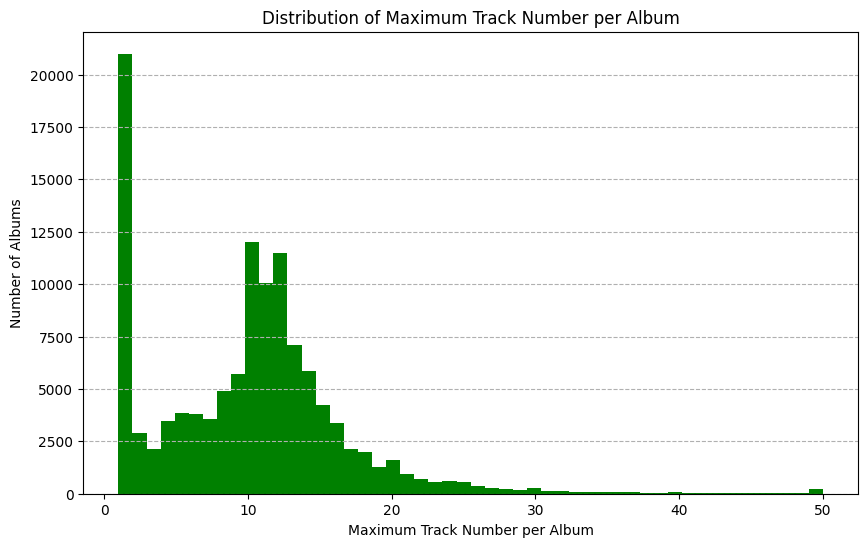

In [37]:
max_track_number_per_album = df.groupBy("album_id").agg(max("track_number").alias("max_track_number"))

plt.figure(figsize=(10, 6))
plt.hist(max_track_number_per_album.toPandas()["max_track_number"], bins=50, color='green')
plt.xlabel('Maximum Track Number per Album')
plt.ylabel('Number of Albums')
plt.title('Distribution of Maximum Track Number per Album')
plt.grid(axis='y', linestyle='--')
plt.show()

### Examining the Distribution of Duration

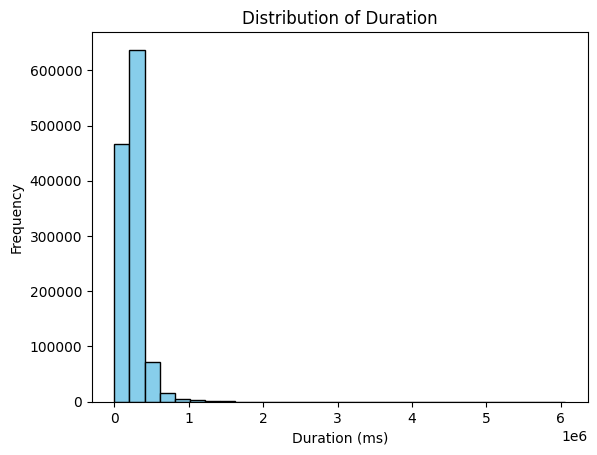

In [38]:
duration_ms_values = df.select("duration_ms").collect()
duration_data = [row['duration_ms'] for row in duration_ms_values]
plt.hist(duration_data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

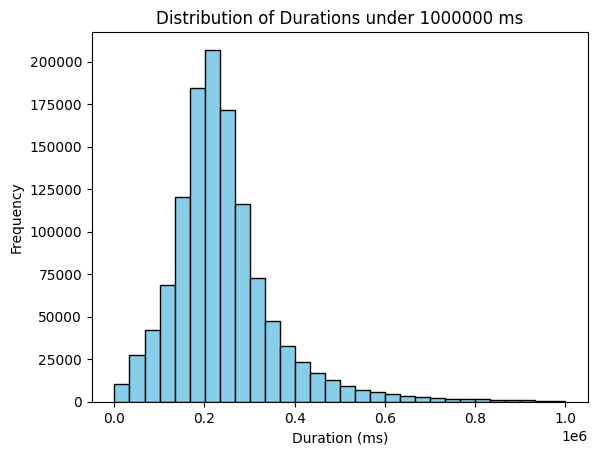

In [39]:
duration_ms_values = df.select("duration_ms").collect()
duration_data = [row['duration_ms'] for row in duration_ms_values if row['duration_ms'] < 1000000]  
plt.hist(duration_data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Durations under 1000000 ms')
plt.show()


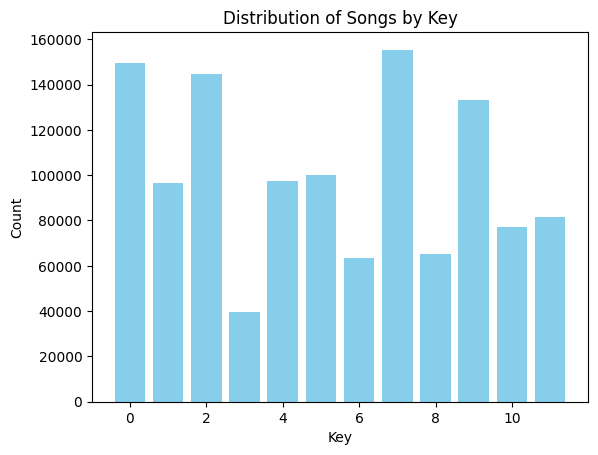

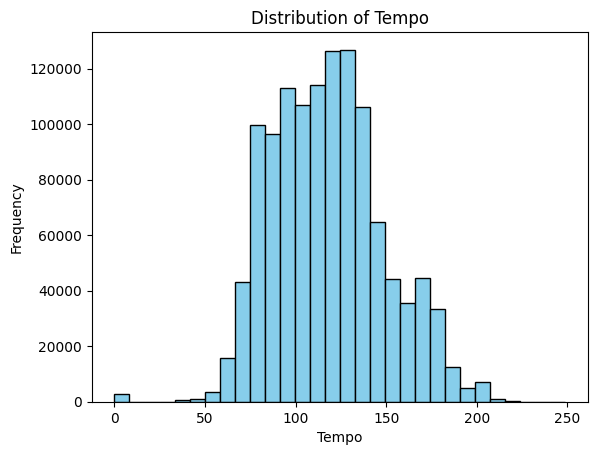

In [40]:
key_counts = df.groupBy('key').count().orderBy('key').collect()
keys = [row['key'] for row in key_counts]
counts = [row['count'] for row in key_counts]

plt.bar(keys, counts, color='skyblue')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Distribution of Songs by Key')
plt.show()



tempo_values = df.select("tempo").collect()
tempo_data = [row['tempo'] for row in tempo_values]
plt.hist(tempo_data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.title('Distribution of Tempo')
plt.show()


Music's tempo range from 70 to 150 beats per minute (BPM) suits different tastes. Slower at 70 BPM creates a chill vibe, like in jazz. Faster at 150 BPM energizes pop and rock tunes.

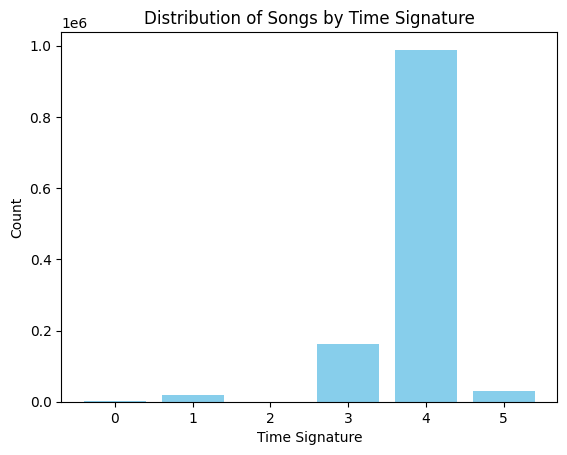

In [41]:
time_sig_counts = df.groupBy('time_signature').count().orderBy('time_signature').collect()
time_signatures = [row['time_signature'] for row in time_sig_counts]
counts = [row['count'] for row in time_sig_counts]

plt.bar(time_signatures, counts, color='skyblue')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.title('Distribution of Songs by Time Signature')
plt.show()

The 4 or 4/4 time  signature is common in music because is often used in upbeat and catchy songs, as it has a steady and consistent pulse that's easy to dance and sing along to.

### Question

1- Lazy Evaluation in Spark and Hadoop: Lazy evaluation means that transformations on the data are not executed immediately but are deferred until an action is performed. In Spark and Hadoop, this allows for optimization of computation by chaining together multiple transformations and executing them in a single pass. For example, in Spark, when we apply transformations like map, filter, or reduce to an RDD, they are not computed right away. Instead, Spark builds up a directed acyclic graph (DAG) of transformations. Only when an action like collect or saveAsTextFile is called, Spark evaluates the DAG and executes the transformations.

2- Parquet files are designed for efficient data storage and processing, especially with large datasets. Unlike CSV files, which store data row by row, Parquet files organize data column-wise. This columnar storage minimizes I/O operations by only reading the columns needed for processing, leading to faster query performance and reduced disk space usage. Overall, Parquet files provide a more optimized solution for handling large datasets compared to traditional file formats like CSV.

3- To enforce Spark to save checkpoints, we can use the checkpoint() method on a DataFrame or RDD. This method allows we to specify a directory where intermediate results will be stored periodically during computation. By checkpointing, we ensure fault tolerance and optimization of lineage by reducing the amount of data that needs to be reprocessed in case of failure. Here's a basic example:

Enable checkpointing
spark.sparkContext.setCheckpointDir("hdfs://wer_checkpoint_directory")

Perform computation and checkpoint
result_df = source_df.someTransformation().checkpoint()

4- Top companies stream their data on a regular routine, e.g. daily. How can we save data, so that we could ﬁlter it based on speciﬁc columns, e.g. date, faster than regular ﬁltering?

- Partitioning: When we partition the data, we split it into different groups based on certain things, like dates. This helps a lot when dealing with data that changes over time, like a series of events. For instance, if we partition the data by date, Spark can quickly skip over unnecessary parts when we're looking for something specific within a certain time frame. This saves time because Spark doesn't have to look through everything, just the partitions that matter.

- Bucketing: Bucketing is about dividing data into a set number of buckets based on the hash value of one or more columns. This means that rows with the same hash value end up in the same bucket. It's handy for spreading out data evenly and making joins between datasets faster.

By using partitioning and bucketing together, we can make storing and finding data in PySpark more efficient. When we ask Spark for specific data, it only needs to check the relevant partitions and buckets, making our queries run faster.

5 - Pandas and PySpark are both powerful tools for data analysis.

1. **Pandas**:
   - **Data Size**: Pandas is ideal for small to medium-sized datasets that can fit into memory (usually up to a few gigabytes). It's highly efficient for in-memory operations, offering fast data manipulation and analysis.
   - **Processing Complexity**: Pandas is well-suited for complex data manipulation tasks, such as filtering, grouping, and aggregation.
   

2. **PySpark**:
   - **Data Size**: PySpark excels in handling large-scale datasets that don't fit into memory. It distributes data across multiple nodes in a cluster, enabling processing of terabytes or even petabytes of data.
   - **Processing Complexity**: PySpark is designed for complex data processing tasks, especially those requiring distributed computing, such as machine learning on big data or ETL (Extract, Transform, Load) pipelines.
   

In summary, Pandas is best suited for smaller datasets and interactive data exploration, offering simplicity and speed for in-memory operations. On the other hand, PySpark shines when dealing with large-scale data processing tasks that require distributed computing, scalability. It's a powerful tool for building robust data pipelines and performing complex analyses on big data. The choice between Pandas and PySpark depends on data size, processing complexity, and scalability needs. 